# Allegheny County Jail Statistics

## Author: Solomon Heisey

### Goal
The goal of this project is to expose statistical trends present at the Allegheny County Jail from 2015 to 2021. DISCLAIMER:
The goal of this project is not to hypothesize why certain trends appear, rather, it is designed to educate others about
the presence of these trends. The dataset used in the project is the result of over 5,000,000 records which have been collected
though daily jail censuses. The dataset has been provided by the Western Pennsylvania Regional Data Center.

In [43]:
import matplotlib.pyplot as plt
import pandas as pd

For the sake of interactive display in Jupyter, matplotlib will be enabled inline.

In [44]:
%matplotlib inline

url = 'http://tools.wprdc.org/downstream/66cdcd57-6c92-4aaa-8800-0ed9d8f03e22'
file_name = './data.csv'

try:
    df_all = pd.read_csv('data.csv', sep=',', engine='python', parse_dates=['census_date'])
except FileNotFoundError:
    df_all = pd.read_csv(url, sep=',', engine='python', parse_dates=['census_date'])
    df_all.to_csv(file_name)



df_all['race'] = df_all['race'].replace(['A'], 'Asian or Pacific Islander')
df_all['race'] = df_all['race'].replace(['B'], 'Black or African American')
df_all['race'] = df_all['race'].replace(['H'], 'Hispanic')
df_all['race'] = df_all['race'].replace(['I'], 'American Indian or Alaskan Native')
df_all['race'] = df_all['race'].replace(['U'], 'Unknown')
df_all['race'] = df_all['race'].replace(['W'], 'White')
df_all['race'] = df_all['race'].replace(['x'], 'Biracial')
df_all['race'] = df_all['race'].replace(['O'], 'All others')


df_all['census_month'] = df_all['census_date'].dt.month
df_all['census_year'] = df_all['census_date'].dt.year

### Gender, Race, and Age Breakdown by Month

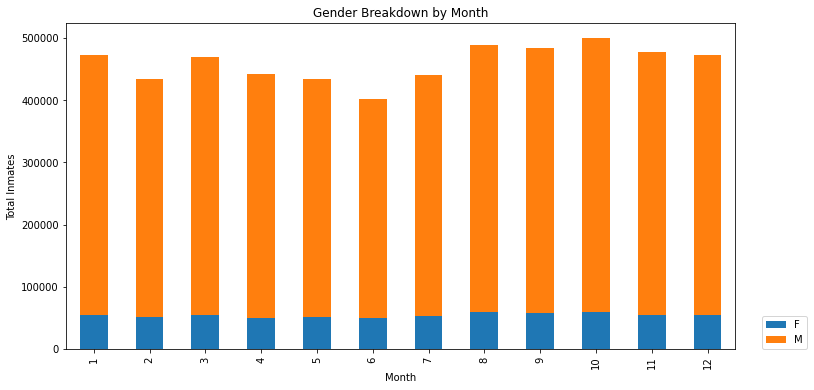

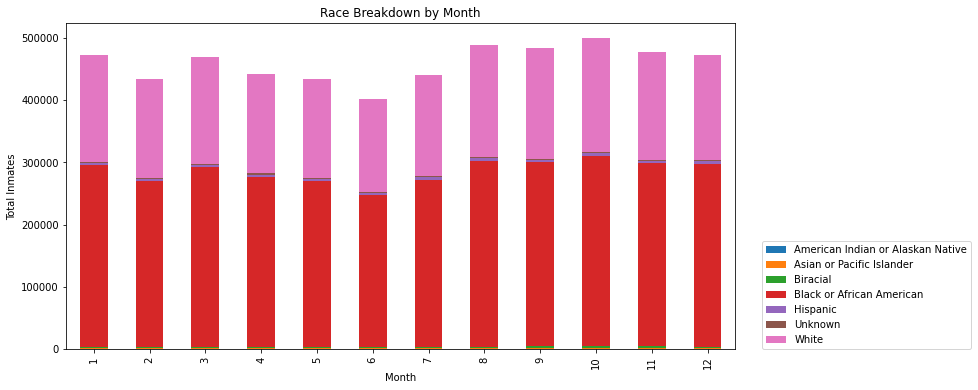

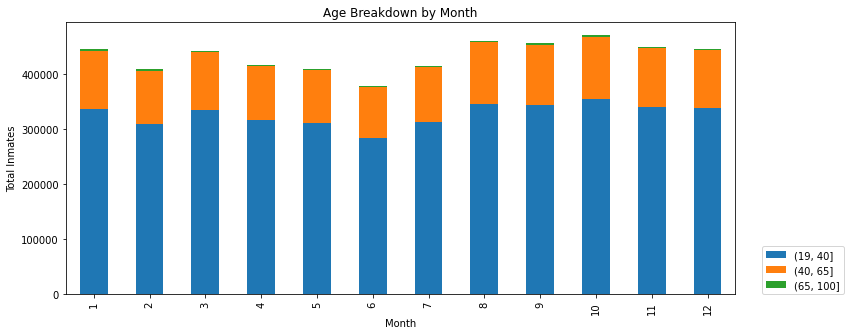

In [45]:
df_gender_month = df_all.groupby(['census_month', 'gender'])['gender'].count().unstack()
df_gender_month.plot.bar(stacked=True, ylabel='Total Inmates', xlabel='Month', title='Gender Breakdown by Month',
                     figsize= (12,6))
plt.legend(loc=(1.04,0))
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.show()

df_race_month = df_all.groupby(['census_month', 'race'])['race'].count().unstack()
df_race_month.plot.bar(stacked=True, ylabel='Total Inmates', xlabel='Month', title='Race Breakdown by Month',
                     figsize= (12,6))
plt.legend(loc=(1.04,0))
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.show()

age_groups = pd.cut(df_all['age_at_booking'], bins=[19, 40, 65, 100])
df_age_month = pd.crosstab(df_all['census_month'], age_groups)
df_age_month.plot.bar(stacked=True, ylabel='Total Inmates', xlabel='Month', title='Age Breakdown by Month', figsize=(12,5))
plt.legend(loc=(1.04,0))
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.show()

## Gender, Race, and Age Breakdown by Year

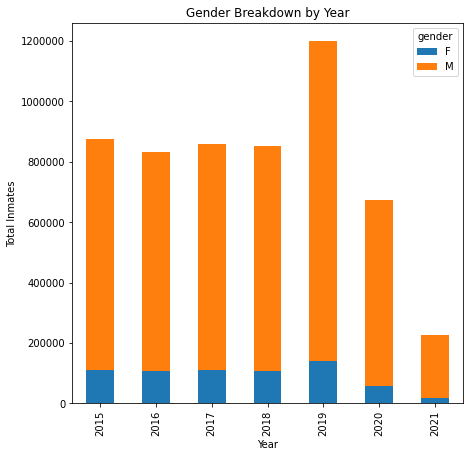

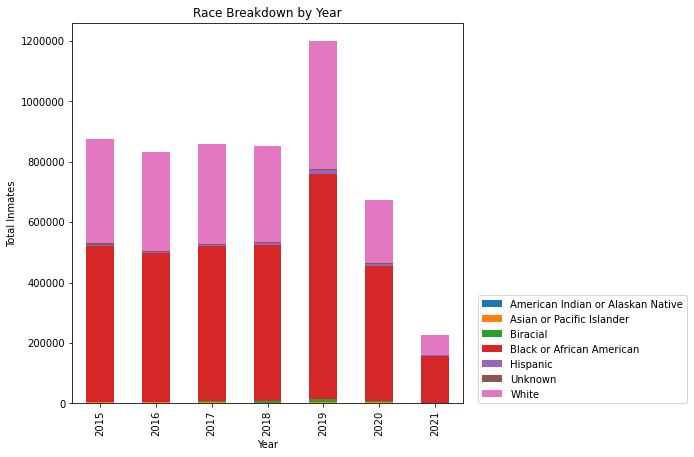

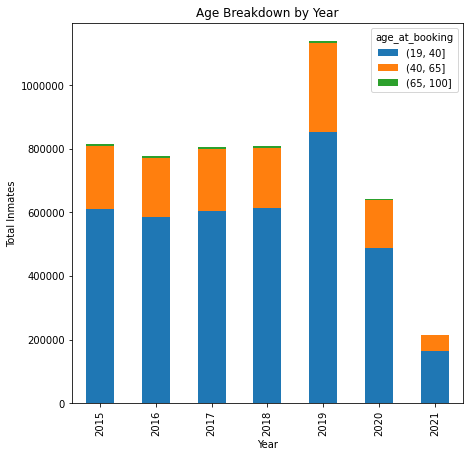

In [46]:
df_gender_year = df_all.groupby(['census_year', 'gender'])['gender'].count().unstack()
df_gender_year.plot.bar(stacked=True, ylabel='Total Inmates', xlabel='Year', title='Gender Breakdown by Year',
                     figsize= (7,7))
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.show()

df_race_year = df_all.groupby(['census_year', 'race'])['race'].count().unstack()
df_race_year.plot.bar(stacked=True, ylabel='Total Inmates', xlabel='Year', title='Race Breakdown by Year',
                     figsize= (7,7))
plt.legend(loc=(1.04,0))
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.show()

age_groups = pd.cut(df_all['age_at_booking'], bins=[19, 40, 65, 100])
df_age_year = pd.crosstab(df_all['census_year'], age_groups)
df_age_year.plot.bar(stacked=True, ylabel='Total Inmates', xlabel='Year', title='Age Breakdown by Year', figsize=(7,7))
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.show()

## Inmate Population Over Time

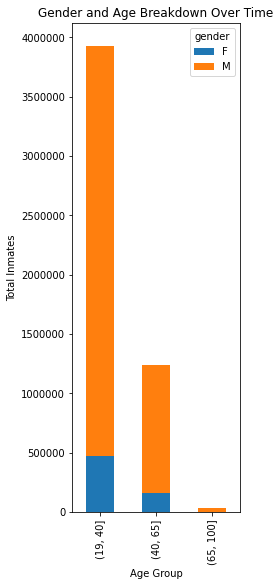

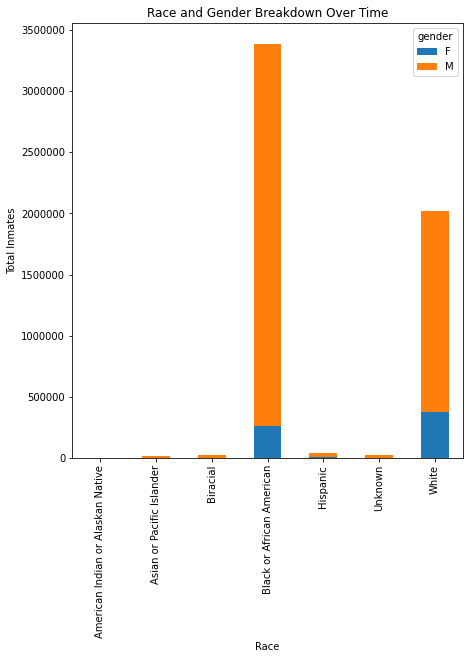

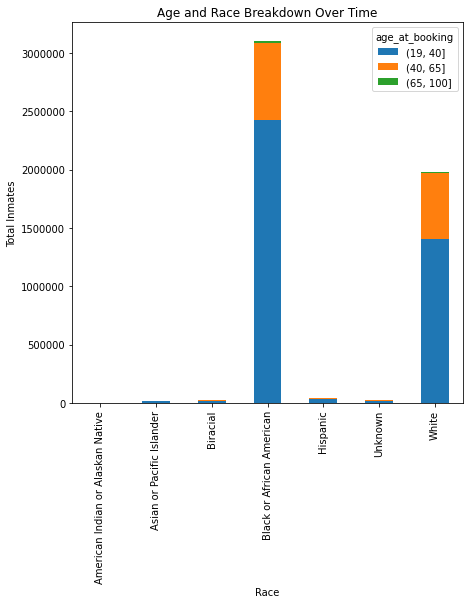

In [47]:
df_age_gender = pd.crosstab(age_groups, df_all['gender'])
df_age_gender.plot.bar(stacked=True, ylabel='Total Inmates', xlabel='Age Group', title='Gender and Age Breakdown Over Time',
                     figsize= (3,9))
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.show()

df_gender_race = df_all.groupby(['race', 'gender'])['race'].count().unstack()
df_gender_race.plot.bar(stacked=True, ylabel='Total Inmates', xlabel='Race', title='Race and Gender Breakdown Over Time',
                     figsize= (7,8))
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.show()

df_age_race = pd.crosstab(df_all['race'], age_groups)
df_age_race.plot.bar(stacked=True, ylabel='Total Inmates', xlabel='Race', title='Age and Race Breakdown Over Time', figsize=(7,7))
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.show()
